In [1]:
import gym.spaces
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from gym.envs.toy_text.frozen_lake import FrozenLakeEnv
env = FrozenLakeEnv(is_slippery=False)

gama = 0.5
epsilon = 0.1
alpha = 0.1

nrEpisodes = 10000

## ACTIONS
nrActions = 4
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

## STATES
nrStates = 4*4

## Random initialization
Q = np.zeros((nrStates,nrActions))

def printPolicy(pi):
    arrows = ["\t←\t", "\t↓\t", "\t→\t", "\t↑\t"]
    size = int(np.sqrt(len(pi)))
    for i in range(size):
        row = "|"
        for j in range(size):
            row += arrows[Pi[i*size+j]] + "|"
        print(row)

Q:
[[  1.72943469e-05   1.12643156e-04   5.88293447e-05   1.85368777e-05]
 [  2.19234350e-05   0.00000000e+00   2.65671629e-04   6.33143323e-05]
 [  6.58602424e-05   1.95828792e-03   5.02605467e-05   4.97918554e-04]
 [  3.95336395e-04   0.00000000e+00   8.39369210e-05   5.52617530e-05]
 [  1.94457240e-05   7.50618826e-04   0.00000000e+00   1.59017149e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   8.34996307e-03   0.00000000e+00   2.28449352e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.10066727e-04   0.00000000e+00   3.78263385e-03   5.83231155e-05]
 [  7.46320786e-04   1.63556633e-02   1.38622469e-02   0.00000000e+00]
 [  3.42821946e-03   6.49739715e-02   0.00000000e+00   2.21794850e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.88592634e-02   1.84887304e-01   4.12347816e-03]
 [ 

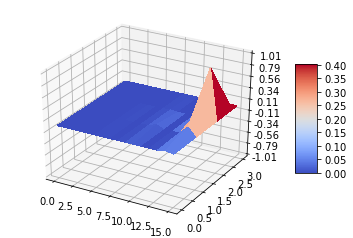

V:
[0.00010656143355412741, 0.00024787720133449511, 0.0018267673070071001, 0.00036916613265163662, 0.00069520609975231673, 0.0, 0.0077294270712808567, 0.0, 0.0035131460560051814, 0.015494202770220945, 0.060242077867638522, 0.0, 0.0, 0.17159532456598103, 0.93015896083518657, 0.0]


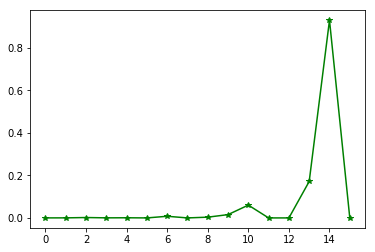

Policy:
[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]
|	↓	|	→	|	↓	|	←	|
|	↓	|	←	|	↓	|	←	|
|	→	|	↓	|	↓	|	←	|
|	←	|	→	|	→	|	←	|
Episode avg. length:  7.676


In [2]:
def egreedyAction(s):
    return np.argmax(Q[s,:]) if np.random.rand(0,1)>epsilon else env.action_space.sample()
 
def V(s):
    return (1-epsilon) * np.max(Q[s,:]) + epsilon * np.mean(Q[s,:])

episodeAccumLen = 0
for e in range(nrEpisodes):
    env.reset()
    #env.render()
    s = 0
    a = egreedyAction(s)
    terminated = False
    while not terminated:
        nextS, R, terminated, debug_info = env.step(a)
        #env.render()
        nextA = egreedyAction(nextS)
        Q[s,a] = Q[s,a] + alpha * (R + gama * Q[nextS, nextA] - Q[s,a])
        s = nextS
        a = nextA
        episodeAccumLen += 1
    #env.render()
    #print("End of episode")

V = [V(s) for s in range(nrStates)]
Pi = [np.argmax(Q[s,:]) for s in range(nrStates)]

print("Q:")
print(Q)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

X = [i for i in range(nrStates)]
Y = [i for i in range(nrActions)]
X, Y = np.meshgrid(X, Y)
Z = Q[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

print("V:")
print(V)

figure()
plot([i for i in range(nrStates)], V, 'g*-')
show()

print("Policy:")
print(Pi)
printPolicy(Pi)
            
print("Episode avg. length: ", episodeAccumLen/nrEpisodes)

        